# Galactic Lensing - confirm Liouville

Galactic lensing can be applied with the requirement that Liouville's theorem
holds, thus in this context: from an isotropic distribution outside the area
of influence of the Galactic magnetic field follows an isotropic arrival
distribution at any point within our Galaxy.
First, we are setting up the oberver which we will place further outside of
the Galactic center than Earth to exaggerate the observed effects:

In [1]:
import crpropa
import matplotlib.pyplot as plt
import numpy as np

n = 10000000

# Simulation setup
sim = crpropa.ModuleList()
# We just need propagation in straight lines here to demonstrate the effect
sim.add(crpropa.SimplePropagation())

# collect arriving cosmic rays at Observer 19 kpc outside of the Galactic center
# to exaggerate effects
obs = crpropa.Observer()
pos_earth = crpropa.Vector3d(-19, 0, 0) * crpropa.kpc
# observer with radius 500 pc to collect fast reasonable statistics
obs.add(crpropa.ObserverSurface(crpropa.Sphere(pos_earth, 0.5 * crpropa.kpc)))
# Use CRPropa's particle collector to only collect the cosmic rays at Earth
output = crpropa.ParticleCollector()
obs.onDetection(output)
sim.add(obs)

# Discard outwards going cosmic rays, that missed Earth and leave the Galaxy
obs_trash = crpropa.Observer()
obs_trash.add(crpropa.ObserverSurface(crpropa.Sphere(crpropa.Vector3d(0), 21 * crpropa.kpc)))
sim.add(obs_trash)

# Lambert's distribution
For the source setup we have to consider that from an isotropic propagation
in the extragalactic Universe, the directions on any surface element follows
the Lambert's distribution (https://en.wikipedia.org/wiki/Lambert%27s_cosine_law).
You could also phrase: vertical incident angles are more frequent due to the
larger visible size of the area of the surface element than flat angles.

Number of hits: 6233


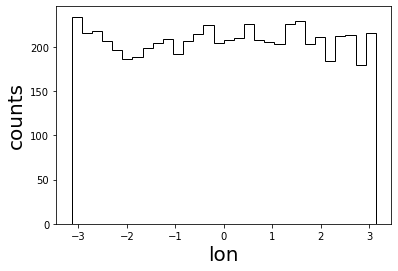

In [2]:
# source setup
source = crpropa.Source()
# inward=True for inwards directed emission, and False for outwards directed emission
center, radius, inward = crpropa.Vector3d(0, 0, 0) * crpropa.kpc, 20 * crpropa.kpc, True
source.add(crpropa.SourceLambertDistributionOnSphere(center, radius, inward))
source.add(crpropa.SourceParticleType(-crpropa.nucleusId(1, 1)))
source.add(crpropa.SourceEnergy(100 * crpropa.EeV))

sim.run(source, n)

print("Number of hits: %i" % len(output))
lons = []
for c in output:
    v = c.current.getDirection()
    lons.append(v.getPhi())

plt.hist(np.array(lons), bins=30, color='k', histtype='step')
plt.xlabel('lon', fontsize=20)
plt.ylabel('counts', fontsize=20)
plt.savefig('lon_distribution_lamberts.png', bbox_inches='tight')

One can see, this results in an isotropic arrival distribution. Note, that one
instead obtains anisotropies if one assumes an isotropic emission from sources
that are distributed uniformly on the sphere shell by e.g..

Number of hits: 9316


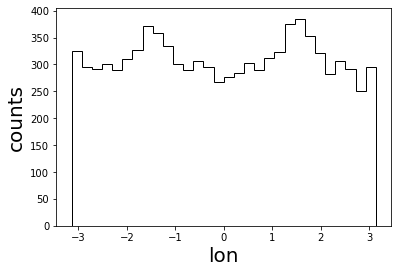

In [3]:
source = crpropa.Source()
source.add(crpropa.SourceUniformShell(center, radius))
source.add(crpropa.SourceIsotropicEmission())
source.add(crpropa.SourceParticleType(-crpropa.nucleusId(1, 1)))
source.add(crpropa.SourceEnergy(100 * crpropa.EeV))

sim.run(source, n)

print("Number of hits: %i" % len(output))
lons = []
for c in output:
    v = c.current.getDirection()
    lons.append(v.getPhi())

plt.hist(np.array(lons), bins=30, color='k', histtype='step')
plt.xlabel('lon', fontsize=20)
plt.ylabel('counts', fontsize=20)
plt.savefig('lon_distribution_double_isotropic.png', bbox_inches='tight')